<a href="https://colab.research.google.com/github/smilesrgouveia/Aula/blob/main/Trilha4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

school = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/gapminder_school_men_15_to_24_years.csv')
school.head()

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,1.82,1.87,1.92,1.97,2.02,2.07,2.12,2.17,2.23,2.28,2.34,2.40,2.46,2.52,2.58,2.64,2.71,2.78,2.84,2.91,2.98,3.05,3.13,3.20,3.28,3.36,3.44,3.52,3.60,3.69,3.78,3.86,3.95,4.05,4.14,4.23,4.33,4.43,4.53,4.63,4.73,4.84,4.94,5.05,5.16,5.27
1,Albania,5.47,5.58,5.69,5.80,5.91,6.02,6.13,6.24,6.36,6.47,6.59,6.71,6.83,6.95,7.06,7.19,7.31,7.43,7.55,7.67,7.80,7.92,8.05,8.17,8.30,8.43,8.55,8.68,8.81,8.95,9.08,9.21,9.35,9.48,9.62,9.75,9.89,10.00,10.20,10.30,10.40,10.60,10.70,10.90,11.00,11.20
2,Algeria,2.77,2.86,2.95,3.04,3.14,3.25,3.35,3.46,3.58,3.69,3.82,3.95,4.08,4.22,4.36,4.51,4.66,4.82,4.99,5.17,5.35,5.54,5.75,5.96,6.19,6.43,6.59,6.76,6.92,7.08,7.23,7.39,7.54,7.69,7.84,7.99,8.13,8.28,8.42,8.57,8.71,8.85,8.99,9.14,9.28,9.42
3,Andorra,9.16,9.30,9.44,9.58,9.72,9.86,10.00,10.10,10.30,10.40,10.60,10.70,10.80,11.00,11.10,11.20,11.40,11.50,11.70,11.80,11.90,12.10,12.20,12.30,12.40,12.60,12.70,12.80,12.90,13.10,13.20,13.30,13.40,13.60,13.70,13.80,13.90,14.10,14.20,14.30,14.40,14.50,14.60,14.70,14.80,14.90
4,Angola,2.25,2.31,2.36,2.42,2.48,2.54,2.60,2.67,2.73,2.80,2.86,2.93,3.00,3.07,3.14,3.22,3.29,3.37,3.44,3.52,3.60,3.69,3.77,3.85,3.94,4.03,4.12,4.21,4.30,4.39,4.49,4.59,4.69,4.79,4.89,5.00,5.10,5.21,5.32,5.43,5.55,5.66,5.78,5.90,6.02,6.14


In [2]:
school_BR = school[ school.country == 'Brazil' ]
school_BR



,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
23,Brazil,3.4,3.47,3.55,3.64,3.72,3.8,3.89,3.97,4.06,4.15,4.24,4.33,4.42,4.52,4.61,4.71,4.81,4.91,5.01,5.11,5.21,5.32,5.42,5.53,5.64,5.75,5.86,5.97,6.08,6.2,6.32,6.43,6.55,6.67,6.79,6.92,7.04,7.17,7.29,7.42,7.55,7.68,7.81,7.94,8.08,8.21


In [3]:

school_AR = school[ school.country == 'Argentina' ]
school_AR


,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
6,Argentina,6.61,6.73,6.84,6.96,7.07,7.19,7.31,7.42,7.54,7.65,7.77,7.88,7.99,8.11,8.22,8.33,8.44,8.55,8.66,8.76,8.86,8.96,9.06,9.16,9.26,9.35,9.45,9.56,9.66,9.78,9.89,10.0,10.1,10.2,10.4,10.5,10.6,10.7,10.8,11.0,11.1,11.2,11.4,11.5,11.6,11.7


In [4]:
BR = pd.melt(school_BR, id_vars=['country'])

BR = BR.rename(columns={'variable':'year','value':'school'})
BR.head()

,country,year,school
0,Brazil,1970,3.40
1,Brazil,1971,3.47
2,Brazil,1972,3.55
3,Brazil,1973,3.64
4,Brazil,1974,3.72


In [5]:
AR = pd.melt(school_AR, id_vars=['country'])
AR.head()

,country,variable,value
0,Argentina,1970,6.61
1,Argentina,1971,6.73
2,Argentina,1972,6.84
3,Argentina,1973,6.96
4,Argentina,1974,7.07


In [6]:
AR = AR.rename(columns={'variable':'year','value':'school'})
AR.head()

,country,year,school
0,Argentina,1970,6.61
1,Argentina,1971,6.73
2,Argentina,1972,6.84
3,Argentina,1973,6.96
4,Argentina,1974,7.07


In [7]:
DF = pd.merge(BR,AR,on=['year'])
DF.head()

,country_x,year,school_x,country_y,school_y
0,Brazil,1970,3.40,Argentina,6.61
1,Brazil,1971,3.47,Argentina,6.73
2,Brazil,1972,3.55,Argentina,6.84
3,Brazil,1973,3.64,Argentina,6.96
4,Brazil,1974,3.72,Argentina,7.07


In [8]:
DF = DF.rename(columns={'school_x':'Brasil','school_y':'AR'})
DF.head()

,country_x,year,Brasil,country_y,AR
0,Brazil,1970,3.40,Argentina,6.61
1,Brazil,1971,3.47,Argentina,6.73
2,Brazil,1972,3.55,Argentina,6.84
3,Brazil,1973,3.64,Argentina,6.96
4,Brazil,1974,3.72,Argentina,7.07






---------------------------------------------------------------------------------------------------------------------------------------------------------------

### **Entre Brasil e Argentina. Qual pais tem um nível de escolaridade maior?**

Na análise de escolaridade, a Argentina é mais desenvolvida que o Brasil 


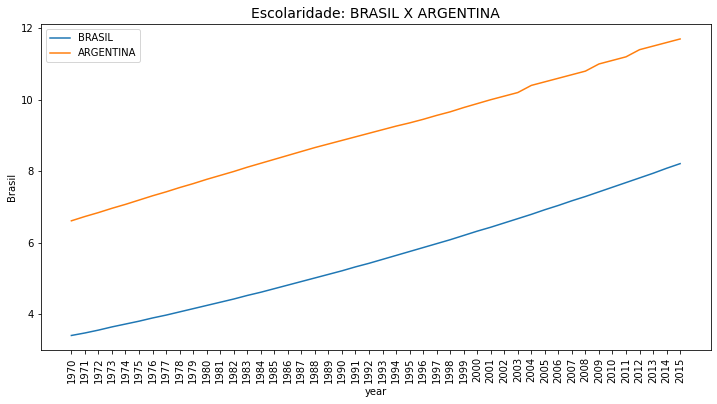

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

plt.figure(figsize=(12,6))

sns.lineplot(x=DF.year, y=DF.Brasil, label='BRASIL')
sns.lineplot(x=DF.year, y=DF.AR, label='ARGENTINA')

plt.title('Escolaridade: BRASIL X ARGENTINA', fontsize=14)
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [10]:
geral = pd.melt(school, id_vars=['country'])
geral = geral.rename(columns={'variable':'year','value':'school'})

geral = geral[geral.year == '2015']
geral.head()


geral = geral.loc[geral.school.nlargest(5).index][['country','school']]

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

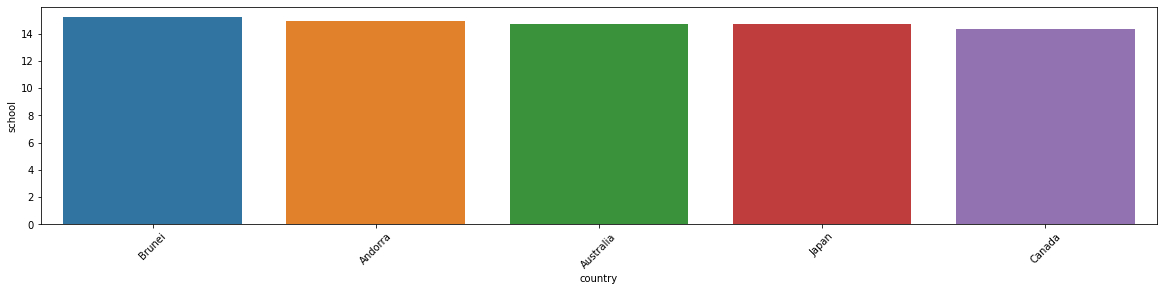

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt



plt.figure(figsize=(20,4))
sns.barplot(x=geral.country, y=geral.school)
plt.xticks(rotation=45)


### **Os 5 países com escolaridade mais altas em 2015 são Brunei, Andorra,Autralisa, Japan e Canada**

In [13]:
import pandas as pd

tax = pd.read_csv('industry_percent_of_gdp.csv')
tax.head()

,country,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.4,15.0,17.1,17.5,15.5,15.8,15.9,15.3,16.8,17.6,18.5,19.6,19.0,18.0,16.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.8,22.7,26.2,26.8,28.2,26.9,26.9,21.9,21.2,22.7,21.2,20.4,21.2,22.1,10.5,10.1,13.4,14.1,12.5
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.3,67.8,60.8,55.2,72.7,72.1,64.9,56.1,53.1,54.6,60.4,58.1,61.9,60.3,44.1,52.4,56.0,56.9,53.4,46.2,41.9,42.6,42.2,47.9,50.0,44.8
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.4,18.1,15.3,16.5,19.4,21.7,23.1,24.1,24.7,25.1,25.3,25.3,25.2,24.4,24.9,24.5,22.9,23.1,21.5,21.8,21.1,20.4,21.3,20.2,19.7
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,71.8,68.0,68.1,71.4,72.7,68.4,63.2,61.4,62.8,61.3,52.2,54.7,53.0,55.1,58.9,46.8,55.3,51.5,46.3,45.5,46.4,45.4,40.0,42.0,48.5,49.7,47.5,49.1,51.7,55.6,57.9,54.8,58.0,52.0,52.5,58.0,57.4,55.0,52.8,43.9,41.4,42.6,47.0,46.2,NaN


In [14]:
tax_BR = tax[ tax.country == 'Brazil' ]
tax_BR


tax_AR = tax[ tax.country == 'Argentina' ]
tax_AR


BR = pd.melt(tax_BR, id_vars=['country'])
BR = BR.rename(columns={'variable':'year','value':'indust'})
BR.head()

AR = pd.melt(tax_AR, id_vars=['country'])
AR = AR.rename(columns={'variable':'year','value':'indust'})
AR.head()

,country,year,indust
0,Argentina,1959,NaN
1,Argentina,1960,NaN
2,Argentina,1961,NaN
3,Argentina,1962,NaN
4,Argentina,1963,NaN


In [ ]:
DF = pd.merge(BR,AR,on=['year'])
DF.head()

DF = DF.rename(columns={'indust_x':'Brasil','indust_y':'AR'})
DF.head()

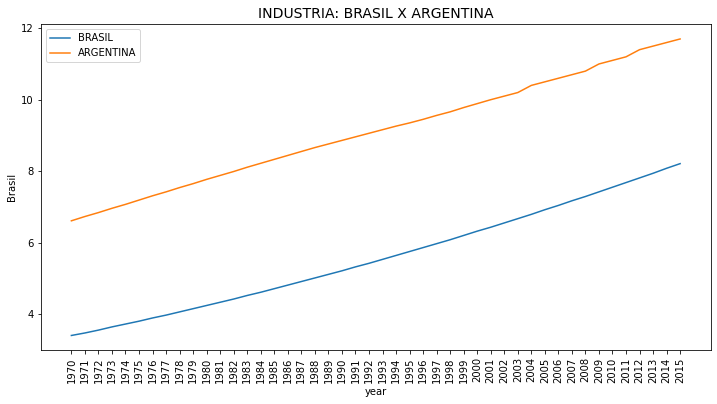

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

plt.figure(figsize=(12,6))

sns.lineplot(x=DF.year, y=DF.Brasil, label='BRASIL')
sns.lineplot(x=DF.year, y=DF.AR, label='ARGENTINA')

plt.title('INDUSTRIA: BRASIL X ARGENTINA', fontsize=14)
plt.legend()
plt.xticks(rotation=90)
plt.show()

## **Conclusão: A indutria de Brasil e Argentina vem caindo significativamente ao longo da história, em alguns periodos o Brasil chegou a ficar a frente, porém nos ultimos anos os dois países tem forte desaceleração.**

In [16]:
BRS = pd.melt(school_BR, id_vars=['country'])
BRS = BRS.rename(columns={'variable':'year','value':'school'})
BRS.head()

,country,year,school
0,Brazil,1970,3.40
1,Brazil,1971,3.47
2,Brazil,1972,3.55
3,Brazil,1973,3.64
4,Brazil,1974,3.72


In [17]:
brasil = pd.merge(BR,BRS,on=['country', 'year'])
brasil.head()



,country,year,indust,school
0,Brazil,1970,32.7,3.40
1,Brazil,1971,32.7,3.47
2,Brazil,1972,33.4,3.55
3,Brazil,1973,34.8,3.64
4,Brazil,1974,35.5,3.72


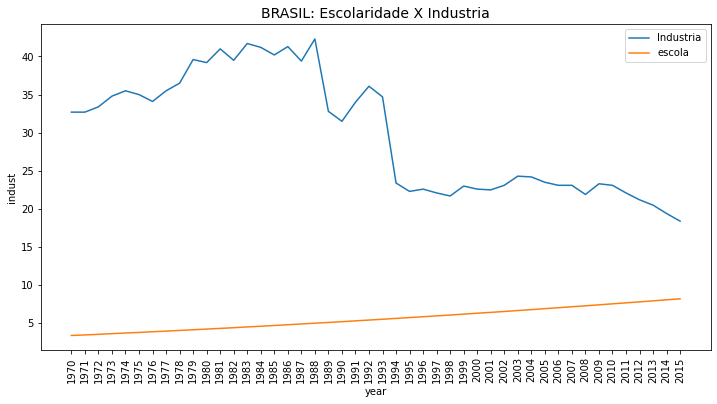

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

plt.figure(figsize=(12,6))

sns.lineplot(x=brasil.year, y=brasil.indust, label='Industria')
sns.lineplot(x=brasil.year, y=brasil.school, label='escola')

plt.title('BRASIL: Escolaridade X Industria', fontsize=14)
plt.legend()
plt.xticks(rotation=90)
plt.show()

## **Conclusão: Ao mesmo que a escolaridade aumento no Brasil a industria tem recuado nos ultimos anos .**

LINK GitHub : https://github.com/smilesrgouveia/Aula/blob/main/TarefaTrilha4_PL.ipynb